In [ ]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import sys
from typing import List
import numpy as np
num_top_test_ngrams = 75
r = pd.read_pickle('../results/results_fmri.pkl')

In [33]:
columns = {
    # fmri stuff
    'module_num': 'Voxel',
    'roi': 'ROI',
    'fmri_test_corr': 'Correlation (test)',
    
    # scores
    'top_score_synthetic': 'Synthetic data score',
    'frac_top_ngrams_module_correct': 'Fraction of matching ngrams (module, top-75)',
    'frac_top_ngrams_test_correct': 'Fraction of matching ngrams (test, top-75)',
            
    # explanation
    'top_explanation_init_strs': 'Explanation',
        
    # ngrams matching the explanation (used 75 ngrams)
    'top_ngrams_module_correct': 'Matching ngrams (module, top-75)',
    'top_ngrams_test_correct': 'Matching ngrams (test, top-75)',

    # all ngrams
    'top_ngrams_module_25': 'Top ngrams (module, top-25)',
    'top_ngrams_test_25': 'Top ngrams (test, top-25)',

    # alternative explanations
    'explanation_init_strs': 'Explanation candidates',
}

tab = (
    r
    .sort_values(by=['top_score_synthetic', 'frac_top_ngrams_test_correct'], ascending=False)
    .filter(columns.keys())
    .rename(columns=columns)
    .round(3)
)
with pd.option_context('display.max_colwidth', -1, 'display.max_rows', 200):
    display(
        tab.head(3)
    )
    tab_join_lists = tab.applymap(lambda x: ' __ '.join(x) if isinstance(x, np.ndarray) or isinstance(x, list) else x)
    tab_join_lists.to_csv('../results/results_fmri.csv', index=False, float_format='%.3f')

,Voxel,ROI,Correlation (test),Synthetic data score,"Fraction of matching ngrams (module, top-75)","Fraction of matching ngrams (test, top-75)",Explanation,"Matching ngrams (module, top-75)","Matching ngrams (test, top-75)","Top ngrams (module, top-25)","Top ngrams (test, top-25)",Explanation candidates
188,143,--,0.628,0.051,0.307,0.080,movement or action,"[started playing, was going to, is going to, started to scream, are going to, went to high, trained to eject, finally went to, went off, started to say, played with us, just heading for, got married in, joined the army, were going to, joined the gym, probably going to, landed in brooklyn, can can drive, went to talk, arrived on on, started writing about, dropped out of]","[would come after me and, yeah ok and i walk, door and i ran i, i can leave whenever i, and she pulls out a, inside to get the keys]","[started playing, up in new, grew up in, was replications of, was going to, is going to, up in two, started to scream, story begins in, up in dartmouth, up in providence, are going to, went to high, trained to eject, was not going, grew up on, grew up near, item originated from, thought yeah yeah, really dismayed to, started to sound, is triggered by, finally went to, went off, really should come]","[but i was ok because, because i had my cigarettes, be but i know it's, show me the way to, i didn't have my cigarettes, his arm a little boy, and i say wow that's, and dollar stores and emergece, he says where were you, number four and she very, blue light of the television, it is so what i, he is he is beautiful, who is that what uh, and it's lit up so, out right when i needed, said was it a bad, stuff about what our lives, out on the street street, about our lives we're both, says damn i hope so, was crying i had no, i don't have a beer, it can still be pretty, there were cul de sacs]","[movement or action, action or movement, such as starting, going, playing, screaming, etc, an action or event that is happening or has happened, movement or change, either physically or mentally]"
178,119,--,0.635,0.050,0.120,0.067,interaction between two or more people,"[turned to me, says tricia, and says tricia, says to me, president gives me, introduces herself and, have an affair, therapist came in, of altercation]","[he says where were you, that was great to meet, we're not gonna be friends, i'm back and he says, we start walking and uh]","[turned to me, turns to me, president looks into, she had this, some pubis sticking, says tricia, problem she, been raised that, and says tricia, he s he, i had this, she bought that, i turned to, sources the the, president put in, shy was cause, pokes her head, the church, that caught my, shy was, other things that, really frustrated him, pubis sticking out, he turns to, says to]","[there and i'm going home, of that head falling off, be fine and she also, be but i know it's, his arm a little boy, apartments this girl lives the, newish to the neighborhood thi, this really cool job washing, says damn i hope so, shoes on i was crying, ch {ig} ch ch ch, silent and lovely and there, there and we're loving the, going to be a vet, held them dear you don't, never met her and just, every single door there's some, each other oh that's almost, puff inhale mm sweet kiss, but unless you've had them, and that was fun and, he is he is beautiful, no shoes on she has, taps out the last s, i didn't have my cigarettes]","[interaction between two or more people, relationships, turning or looking towards someone or something, people interacting with each other, people and relationships]"
42,124,--,0.633,0.048,0.333,0.040,"""um.""","[um mm mm, and and um, um and um, in between um, um and and, cliche um image, around and um, and um and, bla and um, be and um, um mollify the, halt um despite, um or in, to um mollify, in um she, um mm, and um do, the for um, um mollify, model um and, and um, between um her, out and um, to um rufisque, cockerels um and]","[ice cream parlor so u

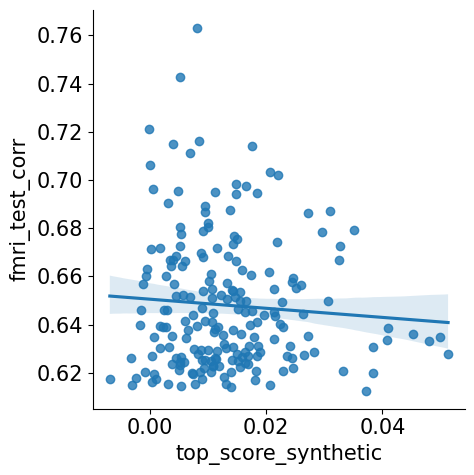

In [29]:
sns.lmplot(x='top_score_synthetic', y='fmri_test_corr', data=r)
plt.show()